<a href="https://colab.research.google.com/github/Dipesh0987/Concepts-and-Technologies-of-AI/blob/main/DipeshKishorChhetri_worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
length = len(df['review'])
print("Dataset info:")
print(f"Shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst review example:\n{df['review'].iloc[0][:500]}...")
print(f"\nSentiment: {df['sentiment'].iloc[0]}")
print(f"\nSentiment distribution:")
print(df['sentiment'].value_counts())

Dataset info:
Shape: (50000, 2)

Column names: ['review', 'sentiment']

First review example:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

Sentiment: positive

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


**Part 1:**
1. Load the dataset and preprocess the reviews.

    a. Convert all text to lowercase.

    b. Remove non-alphabetic characters (punctuation).

    c. Tokenize the reviews and remove common stopwords.

    d. Apply stemming to reduce words to their root form.

2. Split the dataset into training and testing sets (80% training, 20% testing).

3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.

    a. Implement a Bag-of-Words model using CountVectorizer.

    b. Train the Naive Bayes classifier using the training set.

In [14]:
# all reviews to lowercase
df['review'] = df['review'].str.lower()
print("After converting to lowercase:")
print(df['review'].iloc[0][:500])

After converting to lowercase:
one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz


In [15]:
import re

# Remove non-alphabetic characters and extra whitespace
df['review_clean'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['review_clean'] = df['review_clean'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

print("After removing non-alphabetic characters:")
print(df['review_clean'].iloc[0][:500])

After removing non-alphabetic characters:
one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname g


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
df['review_tokens'] = df['review_clean'].apply(lambda x: [word for word in x.split() if word not in stop_words])

print("After tokenization and removing stopwords:")
print(f"First review tokens (first 20): {df['review_tokens'].iloc[0][:20]}")
print(f"Number of tokens in first review: {len(df['review_tokens'].iloc[0])}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After tokenization and removing stopwords:
First review tokens (first 20): ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'mebr', 'br', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes']
Number of tokens in first review: 170


In [17]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

stemmer = PorterStemmer()

# Apply stemming to tokens
df['review_stemmed'] = df['review_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

print("After stemming:")
print(f"First review stemmed tokens (first 20): {df['review_stemmed'].iloc[0][:20]}")

# Join tokens back into strings for the model
df['review_processed'] = df['review_stemmed'].apply(lambda tokens: ' '.join(tokens))

print(f"\nProcessed review (first 500 chars):")
print(df['review_processed'].iloc[0][:500])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


After stemming:
First review stemmed tokens (first 20): ['one', 'review', 'mention', 'watch', 'oz', 'episod', 'youll', 'hook', 'right', 'exactli', 'happen', 'mebr', 'br', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene']

Processed review (first 500 chars):
one review mention watch oz episod youll hook right exactli happen mebr br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordbr br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare


In [19]:
from sklearn.model_selection import train_test_split

# Prepare the features (X) and labels (y)
X = df['review_processed']  # Processed text
y = df['sentiment']  # Labels (positive/negative)

# Convert labels to binary (1 for positive, 0 for negative)
y_binary = y.map({'positive': 1, 'negative': 0})

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print("=== DATA SPLITTING RESULTS ===")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

=== DATA SPLITTING RESULTS ===
Total samples: 50000
Training samples: 40000 (80.0%)
Testing samples: 10000 (20.0%)

Training set class distribution:
sentiment
1    20000
0    20000
Name: count, dtype: int64

Testing set class distribution:
sentiment
0    5000
1    5000
Name: count, dtype: int64


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Use top 5000 features

# Fit and transform on training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform test data
X_test_bow = vectorizer.transform(X_test)

print("=== BAG-OF-WORDS MODEL CREATED ===")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")
print(f"Training data shape: {X_train_bow.shape}")
print(f"Testing data shape: {X_test_bow.shape}")
print(f"\nSample feature names (first 20):")
print(list(vectorizer.get_feature_names_out())[:20])

=== BAG-OF-WORDS MODEL CREATED ===
Vocabulary size: 5000
Training data shape: (40000, 5000)
Testing data shape: (10000, 5000)

Sample feature names (first 20):
['aaron', 'abandon', 'abc', 'abduct', 'abil', 'abl', 'abomin', 'abort', 'abound', 'aboutbr', 'abraham', 'abrupt', 'abruptli', 'absenc', 'absent', 'absolut', 'absorb', 'absurd', 'abund', 'abus']


In [21]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_bow, y_train)

print("=== NAIVE BAYES CLASSIFIER TRAINED ===")
print(f"Classifier type: {type(nb_classifier).__name__}")
print(f"Training completed successfully!")

=== NAIVE BAYES CLASSIFIER TRAINED ===
Classifier type: MultinomialNB
Training completed successfully!


**Part 2:**
1. Evaluate the performance of the model using the following metrics:

    a. Accuracy

    b. Precision, Recall, and F1-score

    c. Confusion Matrix

    d. ROC-AUC Score

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
# Get predictions and prediction probabilities
y_pred = nb_classifier.predict(X_test_bow)
y_pred_proba = nb_classifier.predict_proba(X_test_bow)[:, 1]  # Probabilities for positive class

print("=== PREDICTIONS READY FOR EVALUATION ===")
print(f"Shape of predictions: {y_pred.shape}")
print(f"Shape of prediction probabilities: {y_pred_proba.shape}")

=== PREDICTIONS READY FOR EVALUATION ===
Shape of predictions: (10000,)
Shape of prediction probabilities: (10000,)


In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("=== ACCURACY ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy percentage: {accuracy * 100:.2f}%")

=== ACCURACY ===
Accuracy: 0.8398
Accuracy percentage: 83.98%


In [25]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== PRECISION, RECALL, AND F1-SCORE ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

=== PRECISION, RECALL, AND F1-SCORE ===
Precision: 0.8452
Recall: 0.8320
F1-Score: 0.8385

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

    Negative       0.83      0.85      0.84      5000
    Positive       0.85      0.83      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



=== CONFUSION MATRIX ===
Confusion Matrix:
[[4238  762]
 [ 840 4160]]


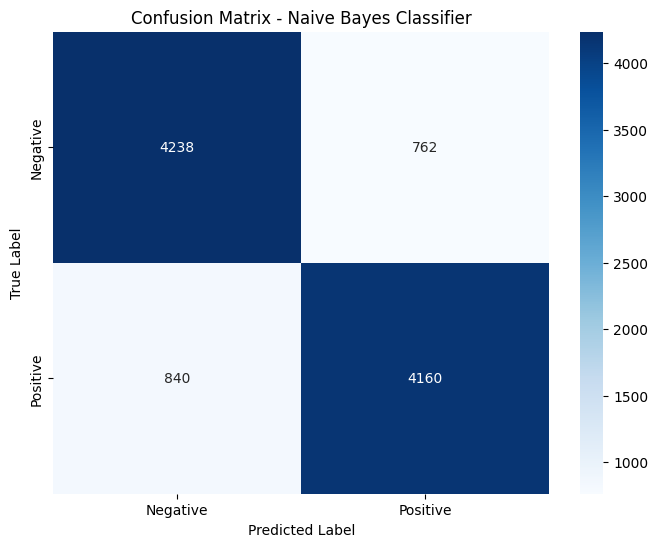


Confusion Matrix Breakdown:
True Negatives: 4238
False Positives: 762
False Negatives: 840
True Positives: 4160

False Positive Rate: 0.1524
False Negative Rate: 0.1680


In [26]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("=== CONFUSION MATRIX ===")
print(f"Confusion Matrix:\n{cm}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate confusion matrix metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"\nFalse Positive Rate: {fp/(fp+tn):.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")

=== ROC-AUC SCORE ===
ROC-AUC Score: 0.9081


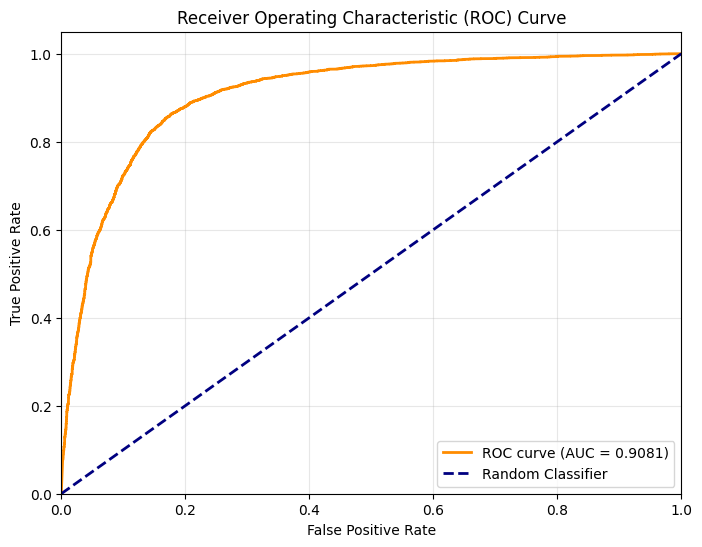


Optimal Threshold (Youden's J): 0.2842
TPR at optimal threshold: 0.8636
FPR at optimal threshold: 0.1778


In [27]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== ROC-AUC SCORE ===")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal threshold (Youden's J statistic)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold (Youden's J): {optimal_threshold:.4f}")
print(f"TPR at optimal threshold: {tpr[optimal_idx]:.4f}")
print(f"FPR at optimal threshold: {fpr[optimal_idx]:.4f}")

In [28]:
def preprocess_review(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()
    tokens = [word for word in review.split() if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

sample_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible film. Waste of time and money. Don't watch it.",
    "The acting was good but the plot was confusing.",
    "One of the best movies I've seen this year, highly recommended!",
    "Boring and predictable, I fell asleep halfway through."
]

print("=== SAMPLE REVIEW PREDICTIONS ===")
for i, review in enumerate(sample_reviews, 1):
    processed_review = preprocess_review(review)
    review_vectorized = vectorizer.transform([processed_review])
    prediction = nb_classifier.predict(review_vectorized)[0]
    probability = nb_classifier.predict_proba(review_vectorized)[0][1]

    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"\nReview {i}:")
    print(f"Text: {review[:60]}...")
    print(f"Predicted: {sentiment}")
    print(f"Probability (Positive): {probability:.4f}")

=== SAMPLE REVIEW PREDICTIONS ===

Review 1:
Text: This movie was absolutely fantastic! I loved every minute of...
Predicted: Positive
Probability (Positive): 0.6757

Review 2:
Text: Terrible film. Waste of time and money. Don't watch it....
Predicted: Negative
Probability (Positive): 0.0048

Review 3:
Text: The acting was good but the plot was confusing....
Predicted: Negative
Probability (Positive): 0.1949

Review 4:
Text: One of the best movies I've seen this year, highly recommend...
Predicted: Positive
Probability (Positive): 0.9152

Review 5:
Text: Boring and predictable, I fell asleep halfway through....
Predicted: Negative
Probability (Positive): 0.0075
